<a href="https://colab.research.google.com/github/Theivaprakasham/Projects/blob/main/Binary%20CNN%20Classifier_Theivaprakasham%20H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**M.Tech(DS) 2020-22 (20-21(Even))**

**20DS708 – Deep Learning for Visual Recognition.**

**Presentation-Evaluation_3.**

**Evalaution Date: 23.04.2021.**

**Theivaprakasham H- CB.EN.P2CEN20026**


In [ ]:
!wget "https://dl.dropboxusercontent.com/s/ol728yg1i8ejio6/Dataset.zip"

--2021-04-23 08:08:49--  https://dl.dropboxusercontent.com/s/ol728yg1i8ejio6/Dataset.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.65.15, 2620:100:6021:15::a27d:410f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.65.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174298488 (166M) [application/zip]
Saving to: ‘Dataset.zip’

Dataset.zip         100%[===================>] 166.22M  20.7MB/s    in 9.5s    

2021-04-23 08:09:00 (17.5 MB/s) - ‘Dataset.zip’ saved [174298488/174298488]



In [ ]:
!unzip -qq "/content/Dataset.zip"

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, AveragePooling2D, AveragePooling2D, ZeroPadding2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt

In [ ]:
train_dataset_path = "/content/Dataset/training_set"
test_dataset_path = "/content/Dataset/test_set"

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dataset_path,
  validation_split=0.2,
  subset='training',
  seed=42,
  image_size=(224,224),
  batch_size=64)

valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dataset_path,
  seed=42,
  validation_split=0.2,
  subset='validation',
  image_size=(224,224),
  batch_size=64)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dataset_path,
  seed=42,
  image_size=(224,224),
  batch_size=64)

Found 5319 files belonging to 2 classes.
Using 4256 files for training.
Found 5319 files belonging to 2 classes.
Using 1063 files for validation.
Found 2032 files belonging to 2 classes.


In [ ]:
train_ds.class_names

['cats', 'dogs']

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


**1. For the given dataset, compute the test accuracy.**

**(a) First Model:**

**(i) Build the 2D convolution with kernel size 3 x 3 and the no.of kernel is 32. Activation function Relu.**

**(ii) Max Pooling – (2 x 2).**

**(iii) Dense -128**

**(iv) Softmax Classifier.**

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 394272)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               50466944  
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 258       
Total params: 50,468,098
Trainable params: 50,468,098
Non-trainable params: 0
__________________________________________

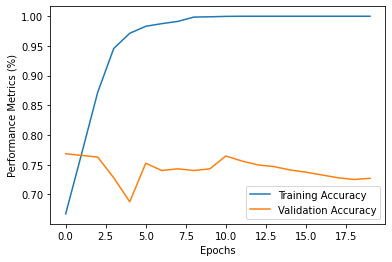

In [ ]:
#Defining Model

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape = (224,224,3)),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(2, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

datalogger = model.fit(train_ds, epochs=20, validation_data=valid_ds)

plt.plot(datalogger.history['accuracy'], label="Training Accuracy")
plt.plot(datalogger.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Performance Metrics (%)')
plt.legend()

print("\nEvaluating the Test Dataset using the developed model\n")

print("Model Test Accuracy: ", model.evaluate(test_ds)[1]*100, "%")

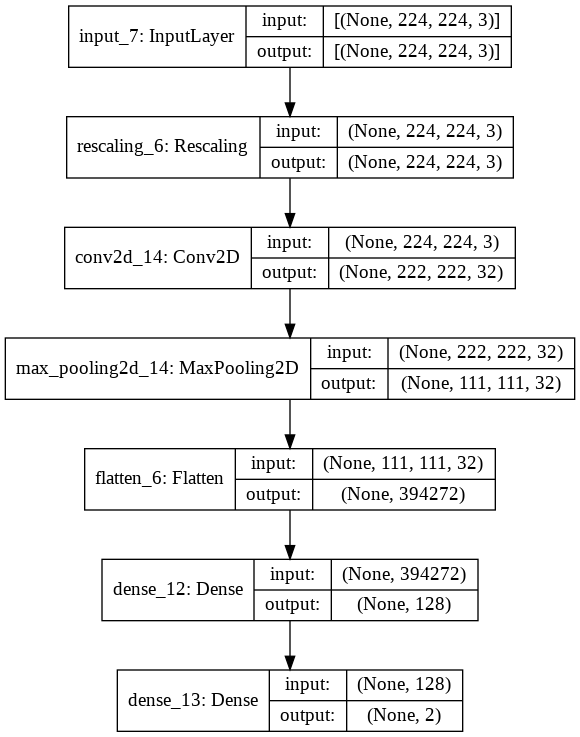

In [ ]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

**(b) For the second model, modify the architecture given in (a) with the addition of  one more 2D convolution layer with the same kernel size and double the number of kernels from the previous layer followed by a max pooling layer.**

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

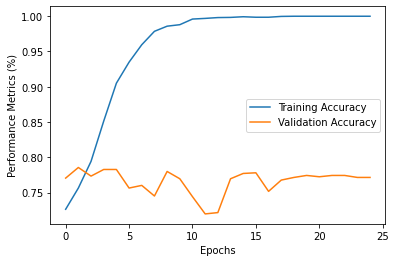

In [ ]:
'''
For the second model, we modify the architecture given in (a) with the addition of  one more 2D
convolution layer with the same kernel size and double the number of kernels from the previous
layer followed by a max pooling layer.
'''

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape = (224,224,3)),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

datalogger = model.fit(train_ds, epochs=25, validation_data=valid_ds)

plt.plot(datalogger.history['accuracy'], label="Training Accuracy")
plt.plot(datalogger.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Performance Metrics (%)')
plt.legend()

print("\nEvaluating the Test Dataset using the developed model\n")

print("Model Test Accuracy: ", model.evaluate(test_ds)[1]*100, "%")

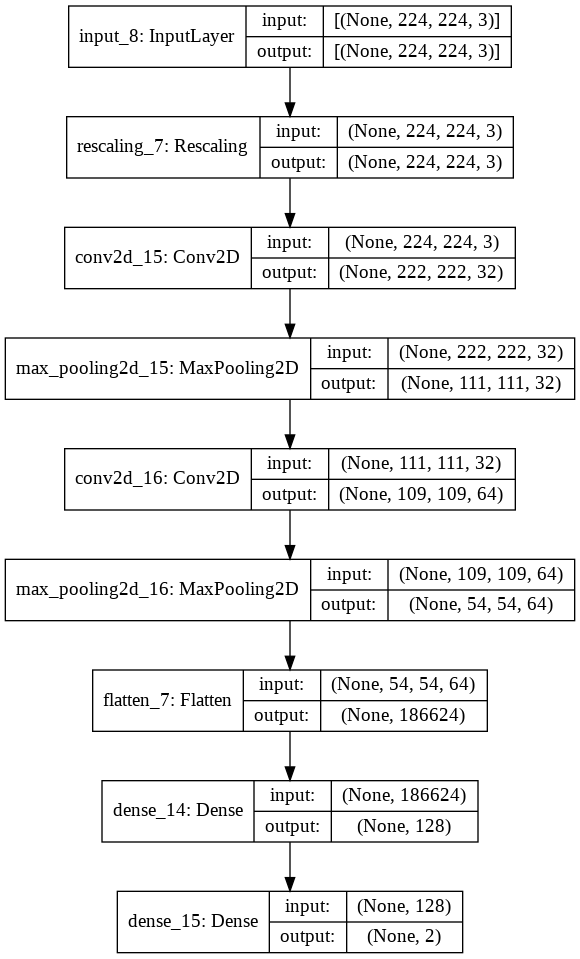

In [ ]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

**(c) For the third model, modify the architecture given in (b) with the addition of  one more 2D convolution layer with the same kernel size and double the number of kernels from the previous layer followed by a max pooling layer.**

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 26, 26, 128)      

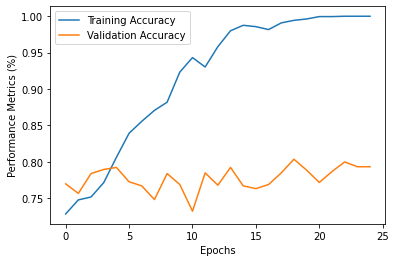

In [ ]:
'''
For the third model, modify the architecture given in (b) with the addition of  one more 2D
convolution layer with the same kernel size and double the number of kernels from the previous
layer followed by a max pooling layer.
'''

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape = (224,224,3)),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

datalogger = model.fit(train_ds, epochs=25, validation_data=valid_ds)

plt.plot(datalogger.history['accuracy'], label="Training Accuracy")
plt.plot(datalogger.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Performance Metrics (%)')
plt.legend()  

print("\nEvaluating the Test Dataset using the developed model\n")

print("Model Test Accuracy: ", model.evaluate(test_ds)[1]*100, "%")

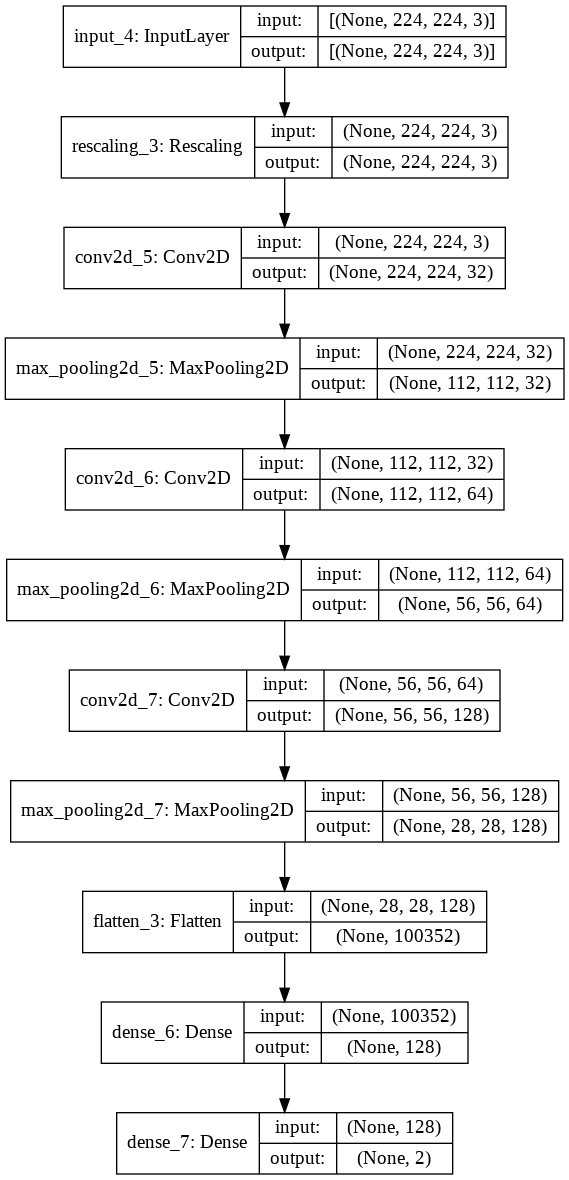

In [ ]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

**(d) Add a 20% dropout layer after every  max pooling  layer  developed  in (c) follwed by 50% dropout after the dense layer.**

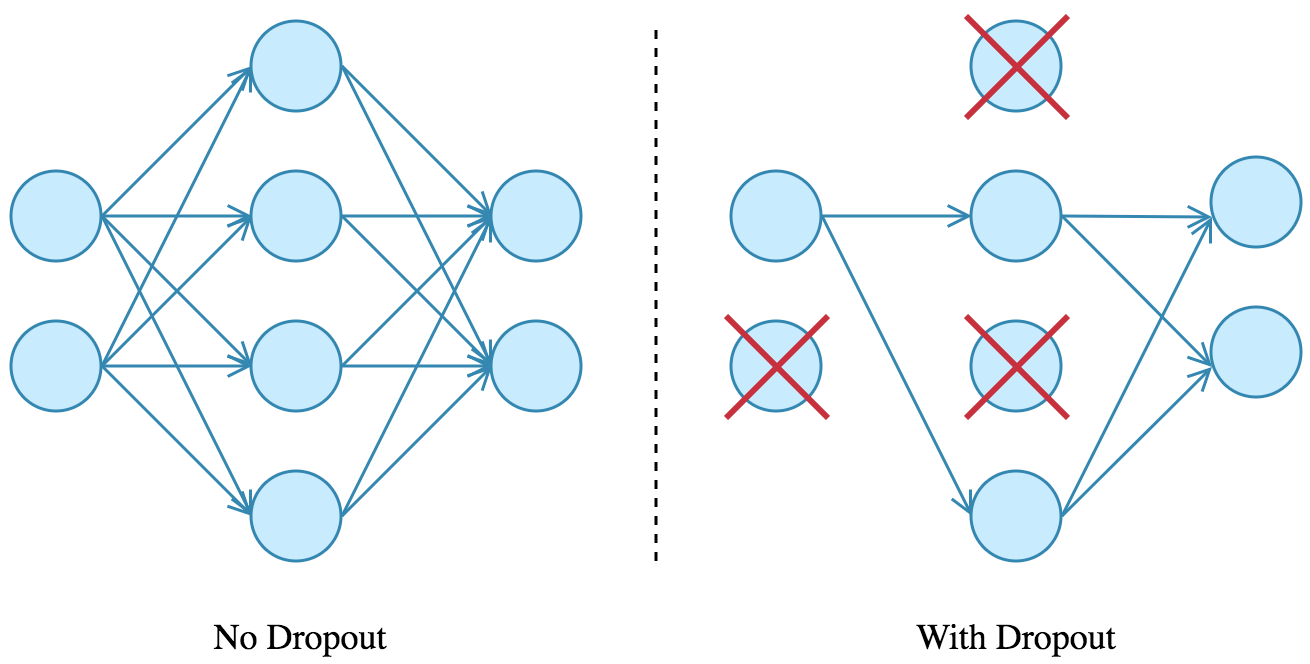

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

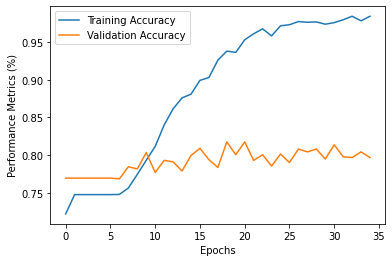

In [ ]:
'''
Add a 20% dropout layer after every  max pooling  layer  developed  in (c) follwed by 50%
dropout after the dense layer.
'''

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape = (224,224,3)),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  Conv2D(filters=32, kernel_size=(3,3),  strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),
  Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),
  Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

datalogger = model.fit(train_ds, epochs=35, validation_data=valid_ds)

plt.plot(datalogger.history['accuracy'], label="Training Accuracy")
plt.plot(datalogger.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Performance Metrics (%)')
plt.legend()

print("\nEvaluating the Test Dataset using the developed model\n")

print("Model Test Accuracy: ", model.evaluate(test_ds)[1]*100, "%")

**(e) Try to improve the accuracy by modifying the architecture on your own based on the logic behind the understanding of deep convolutional neural network.**

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.InputLayer(input_shape = (224,224,3)),
                             tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
                             #ResnetIdentityBlock(5, [32,64,3]),
                             Conv2D(filters=128, kernel_size=(50,50), padding='valid', strides=(1,1), activation='relu'),
                             BatchN
                             Conv2D(filters=256, kernel_size=(25,25), padding='valid', strides=(1,1), activation='relu'),
                             GlobalAveragePooling2D(),
                             Flatten(),
                             Dense(256, activation='relu'),
                             Dropout(0.5),
                             Dense(2, activation='softmax')])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 175, 175, 128)     960128    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 151, 151, 256)     20480256  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 256)               0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)             

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

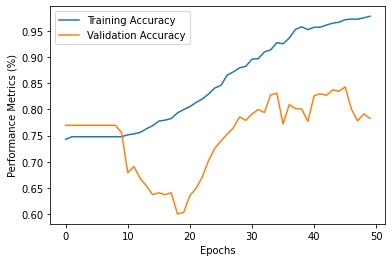

In [ ]:
''' Custom Model with more Conv Layers '''

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape = (224,224,3)),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),

  Conv2D(filters=32, kernel_size=(3,3),  strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=512, kernel_size=(2,2), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=2048, kernel_size=(2,2), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.5),
  
  Dense(2, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

datalogger = model.fit(train_ds, epochs=50, validation_data=valid_ds)

plt.plot(datalogger.history['accuracy'], label="Training Accuracy")
plt.plot(datalogger.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Performance Metrics (%)')
plt.legend()

print("\nEvaluating the Test Dataset using the developed model\n")

print("Model Test Accuracy: ", model.evaluate(test_ds)[1]*100, "%")

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_11 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_75 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 54, 54, 64)      

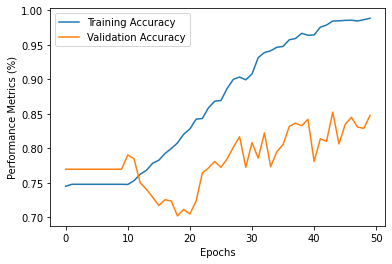

In [ ]:
''' Custom Model with more Conv Layers and Additional Dense Layer '''

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape = (224,224,3)),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),

  Conv2D(filters=32, kernel_size=(3,3),  strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'), ##Additional Conv Layer
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=512, kernel_size=(2,2), strides=(1,1), activation='relu'), ##Additional Conv Layer
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Conv2D(filters=2048, kernel_size=(2,2), strides=(1,1), activation='relu'),  ##Additional Conv Layer
  MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
  Dropout(0.2),

  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.5),
  
  Dense(256, activation='relu'), ##Additional Dense Layer
  Dropout(0.2),
  
  Dense(2, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

datalogger = model.fit(train_ds, epochs=50, validation_data=valid_ds)

plt.plot(datalogger.history['accuracy'], label="Training Accuracy")
plt.plot(datalogger.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Performance Metrics (%)')
plt.legend()

print("\nEvaluating the Test Dataset using the developed model\n")

print("Model Test Accuracy: ", model.evaluate(test_ds)[1]*100, "%")

Text(0, 0.5, 'Test Accuracy')

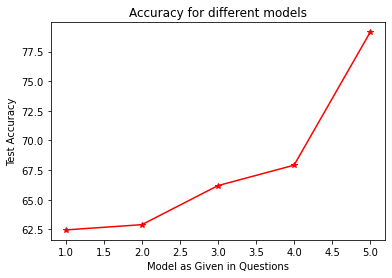

In [ ]:
import matplotlib.pyplot as plt

models = [1,2,3,4,5]
test_accuracy = [62.45078444480896, 62.89370059967041, 66.19094610214233, 67.91338324546814, 79.1338562965393]

plt.plot(models,test_accuracy, '-*r')
plt.title("Accuracy for different models")
plt.xlabel("Model as Given in Questions")
plt.ylabel("Test Accuracy")

**For the above developed architectures, the below are the inference based on the accuracy.**

**First model**

The model is very shallow with just one Conv2d, one MaxPooling in Feature Extaction head and one Dense layer in Classifier head.

The training accuracy is higher (100%) than the test accuracy(62.4%) which clearly indicates overfitting.

**Second Model**

The model is less shallow with two Conv2d, two MaxPooling in Feature Extaction head and one Dense layer in Classifier head.

The training accuracy is higher (100%) than the test accuracy(62.8%) which clearly indicates overfitting.

Though this model has slighlty better accuracy than the first one, the model is still seen overfitting

**Third Model**

The model is shallow with three Conv2d, three MaxPooling in Feature Extaction head and one Dense layer in Classifier head.

The training accuracy is higher (100%) than the test accuracy(66.8%) which clearly indicates overfitting.

With increase in number of Conv layers and successive increase in number of kernals, we observe that the model's accuracy is increasing. But still the model is seen overfitting.


**Fourth Model**

The fourth model is a replica of third model with three Conv2d, three MaxPooling in Feature Extaction head and one Dense layer in Classifier head except for additional Dropout layer which acts as a regularizer. Dropout regularizer randomly ignores few edges and trains the model accordingly.

Not surprising that, the effect of regularisation is seen in the training where it takes a long time to train the model. We also observe that the model is less overfitting compared to other 3 models which dont use regularizers and also has higher accuracy (68%).

**Fifth Model**

In this model, We have added more convolutional layers with increased kernals. This leads to Deep exploration of Data and come up with specialized features.

We have also added one more dense layer with increased number of Neurons to increase the classification efficacy.

The accuracy(79%) of the 5th Model is much better than First 4 shallow models (62%, 63%, 66%, 67.9%).



**Overall Inference from this Assignment Questions:**

* Increasing the number of Conv Layers with progressive increase in number of kernals increases the Accuracy of the model. This is because deeper exploration of high level features.

* Adding Overfitting helps the model to generalize and give better accuracy

* Adding Additional Dense layer in the classfifier head increases the accuracy